# **Franck-Hertz Experiment**
---

## Authors
<div align="center">

No | Name | ID | GitHub Username | In Charge Activity
:-: | :- | :-: | :- | :-
1 | Jonathan Sugijanto | 10222007 | [JonathanSugijanto](https://github.com/jonathansugijanto) | Discussion on GitHub issues | [title](github/gist_link) | 10
2 | Afrah Damara Yani | 10222049 | [Coocoomber333](https://github.com/Coocoomber333) | Notebook finalization |  [title](github/gist_link) | 50
3 | Melinda Alberta | 10222066 | [melindaaaaaaaaaaaaaaaaaaaaa](https://github.com/melindaaaaaaaaaaaaaaaaaaaaa) | Slide on OSF | [title](github/gist_link) | 20 
4 | Eliza Putri Hapsani | 10222103 | [pheliza](https://github.com/pheliza) | YouTube presentation video | [title](github/gist_link) | 20
<div>

## Abstract  
<div style="text-align: justify;">
One of the first experiments that provided definitive evidence for quantum theory and the Bohr atomic model was the Franck-Hertz experiment. This study aims to recreate the Franck-Hertz experiment using neon gas to test energy quantization through electron excitation. References indicate several possible excitation energy levels governed by selection rules. The excitation mechanism and the rules of electron collision-induced excitation show the highest probability for the 2p → 3p transition. Variations in filament and barrier voltage produce a current-voltage curve with peak and valley patterns, indicating atomic excitation processes. The average excitation energy of 17.9 eV is consistent with the 2p → 3p transition, with an error margin of 5.63%. The observed orange light originates from the 3p → 3s transition, corresponding to a wavelength of 586 nm, supporting the validity of this experiment in understanding atomic excitation.
</div>

Keywords: excitation, electron, Franck-Hertz, neon, collision 

## Background
<div style="text-align: justify;">

In the early 20th century, quantum theory began to show significant advancements, one of which was the Bohr atomic theory that introduced the concept of energy quantization in atoms (Bohr, 1913). This theory was supported by several experimental pieces of evidence, one of the earliest being the Franck-Hertz experiment, published a year after Bohr's theory (Franck & Hertz, 1914). In this experiment, electrons were accelerated in a tube filled with mercury gas, and at certain discrete energy levels, a drastic drop in electron energy was observed. According to the theory, this phenomenon occurs because atoms absorb energy through inelastic collisions to undergo excitation. The Franck-Hertz experiment became a crucial piece of evidence supporting the concept of quantum energy, marking an initial step in the development of quantum theory and its technological applications.

However, while these early developments established the foundation of quantum mechanics, significant challenges remain in bridging theoretical predictions with experimental verifications, especially in more complex systems. For instance, modern applications of quantum theory, such as quantum computing and quantum cryptography, require precise manipulation and understanding of quantum states in multi-particle systems. Addressing these challenges necessitates the development of new experimental techniques and theoretical frameworks.

Current state-of-the-art research in this domain explores various approaches, including advanced spectroscopy methods, ultrafast laser systems, and high-resolution imaging techniques, to investigate quantum phenomena at unprecedented scales. For example, recent advancements in femtosecond spectroscopy have enabled scientists to observe quantum dynamics in real time, providing insights into fundamental processes such as energy transfer and wavefunction coherence (Smith et al., 2020). Additionally, the integration of artificial intelligence in quantum research has emerged as a promising avenue to analyze complex datasets and optimize experimental designs (Chen et al., 2021).

The purpose of this work is to address a specific gap in understanding the interaction between quantum states in a controlled environment. By employing novel experimental setups and computational models, this research aims to provide deeper insights into the mechanisms driving quantum phenomena, ultimately contributing to the advancement of quantum technology.
</div>


## method
*Write flowchart, algorithm, code, libraries, dependencies, platform, software, and any infomration that help others to reproduce your work. Include equations and figures if necessary. (Point: 10)*



## method
### Experimental Methodology
<div style="text-align: justify;">

This experiment was conducted on Tuesday, November 12, 2024, in the Advanced Physics Laboratory at Institut Teknologi Bandung, Indonesia. The experiment was quantitative in nature and employed an experimental method. The study varied the accelerating voltage $U_2$, filament voltage $U_1$, and retarding voltage $U_3$ in the Franck-Hertz experiment using Neon gas. The variable measured in this experiment was the collector current $I$.

The experiment utilized a CASSY sensor and its software (on a computer) to measure all currents and voltages used during the experiment. The voltages were supplied by the Franck-Hertz power supply, which was directly connected to the Neon Franck-Hertz tube used in the experiment.
</div>
<div align="center">

Table III.1: Variations in filament voltage $(U_1)$ and retarding voltage $(U_3)$ used in the experiment
**Variation** | $U_1$ (V) | $U_3$ (V)
:-: | :-: | :-:
1 | 1.5 | 7.0
2 | 1.0 | 7.0
3 | 2.0 | 7.0
4 | 1.5 | 6.0
5 | 1.5 | 8.0

![Figure III.1: Experiment Methodology flowchart.](figs/exp_flowchart.png)
Figure III.1: Experiment Methodology flowchart.
</div>

### Computational Methodology

<div style="text-align: justify;">

The computation methodology of this work is summarized with the flowchart in Figure III.2. 

Because of the need of versatile data formatting, data cleaning, data processing, and data visualization, the Python programming language is chosen. In particular our algorithm uses the dependencies listed bellow.
```
matplotlib==3.7.2
numpy==1.25.1
pandas==2.2.3
scipy==1.14.1
```
Whereas the library initializations are done as follows.
</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib as mpl

C:\Users\Dell\AppData\Local\Temp\ipykernel_23312\1772115832.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="text-align: justify;">

The experimental data was exported from the CASSY software under the `raw_data/` directory with name convention as follows: 
```
X.X Y.Y Z.csv
```
Where X.X is the $U_{1}$ value, Y.Y the $U_{3}$ value, and Z the given variation's experiment number. The data exported from the CASSY software uses the Indonesia numbering format which is incompatible with python. Therefore, a data fomatting algorithm (`code/data_fomatting.ipynb`) is employed as follows.
</div>

In [3]:
# Direktori input dan output
input_directory = "raw_data"
output_directory = "formatted_data"

# Membuat folder output jika belum ada
os.makedirs(output_directory, exist_ok=True)

# Loop melalui semua file di direktori input
for filename in os.listdir(input_directory):
    if filename.endswith(".csv"):
        # Path lengkap file input dan output
        input_file_path = os.path.join(input_directory, filename)
        output_file_path = os.path.join(output_directory, filename)

        # Baca file CSV
        with open(input_file_path, "r") as file:
            data = file.read()
        
        # Ganti koma dengan titik
        data = data.replace(",", ".")
        
        # Simpan kembali data yang diformat ke folder output
        with open(output_file_path, "w") as file:
            file.write(data)
        
        # Baca file CSV yang telah diformat untuk verifikasi
        df = pd.read_csv(output_file_path)
        print(f"Processed file: {filename}")
        print(df.head())


Processed file: 1.0 7.0 1.csv
  Time t / s;Voltage U_A1 / V;Voltage U_B1 / V;Collector current I_A / nA;Acceleration voltage U_B / V
0                            0;8.64;7.895;8.64;78.95                                                  
1                         0.1;-0.075;0.03;-0.075;0.3                                                  
2                       0.201;0.195;0.055;0.195;0.55                                                  
3                         0.299;0.27;0.085;0.27;0.85                                                  
4                         0.4;0.315;0.115;0.315;1.15                                                  
Processed file: 1.0 7.0 2.csv
  Time t / s;Voltage U_A1 / V;Voltage U_B1 / V;Collector current I_A / nA;Acceleration voltage U_B / V
0                           0;1.875;0.015;1.875;0.15                                                  
1                         0.1;0.345;0.045;0.345;0.45                                                  
2            

<div style="text-align: justify;">

The result of the data formatting algorithm can be found in `cleaned_data/` directory. The output csv uses the English format with `;` as separator. All the data can then be plotted as follows.
</div>

In [4]:
# Path ke folder data CSV formatted_data
folder_path = 'formatted_data/'  # Ganti dengan path folder yang benar
csv_files = ["1.5 7.0 1.csv", "1.5 7.0 2.csv", "1.5 7.0 3.csv",
             "1.0 7.0 1.csv", "1.0 7.0 2.csv", "1.0 7.0 3.csv",
             "2.0 7.0 1.csv", "2.0 7.0 2.csv", "2.0 7.0 3.csv",
             "1.5 6.0 1.csv", "1.5 6.0 2.csv", "1.5 6.0 3.csv",
             "1.5 8.0 1.csv", "1.5 8.0 2.csv", "1.5 8.0 3.csv"]
separator = ";"

In [5]:
# adjust ylim for all variations
def adjust_ylim(variasi_ke, lim_var_1 = None, lim_var_2 = None, lim_var_3 = None, lim_var_4 = None, lim_var_5 = None, ax=None):
    if(ax==None):
        if(variasi_ke == 1 and lim_var_1 != None):
            plt.ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            plt.ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            plt.ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            plt.ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            plt.ylim(lim_var_5)
    else:
        if(variasi_ke == 1 and lim_var_1 != None):
            ax.set_ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            ax.set_ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            ax.set_ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            ax.set_ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            ax.set_ylim(lim_var_5)

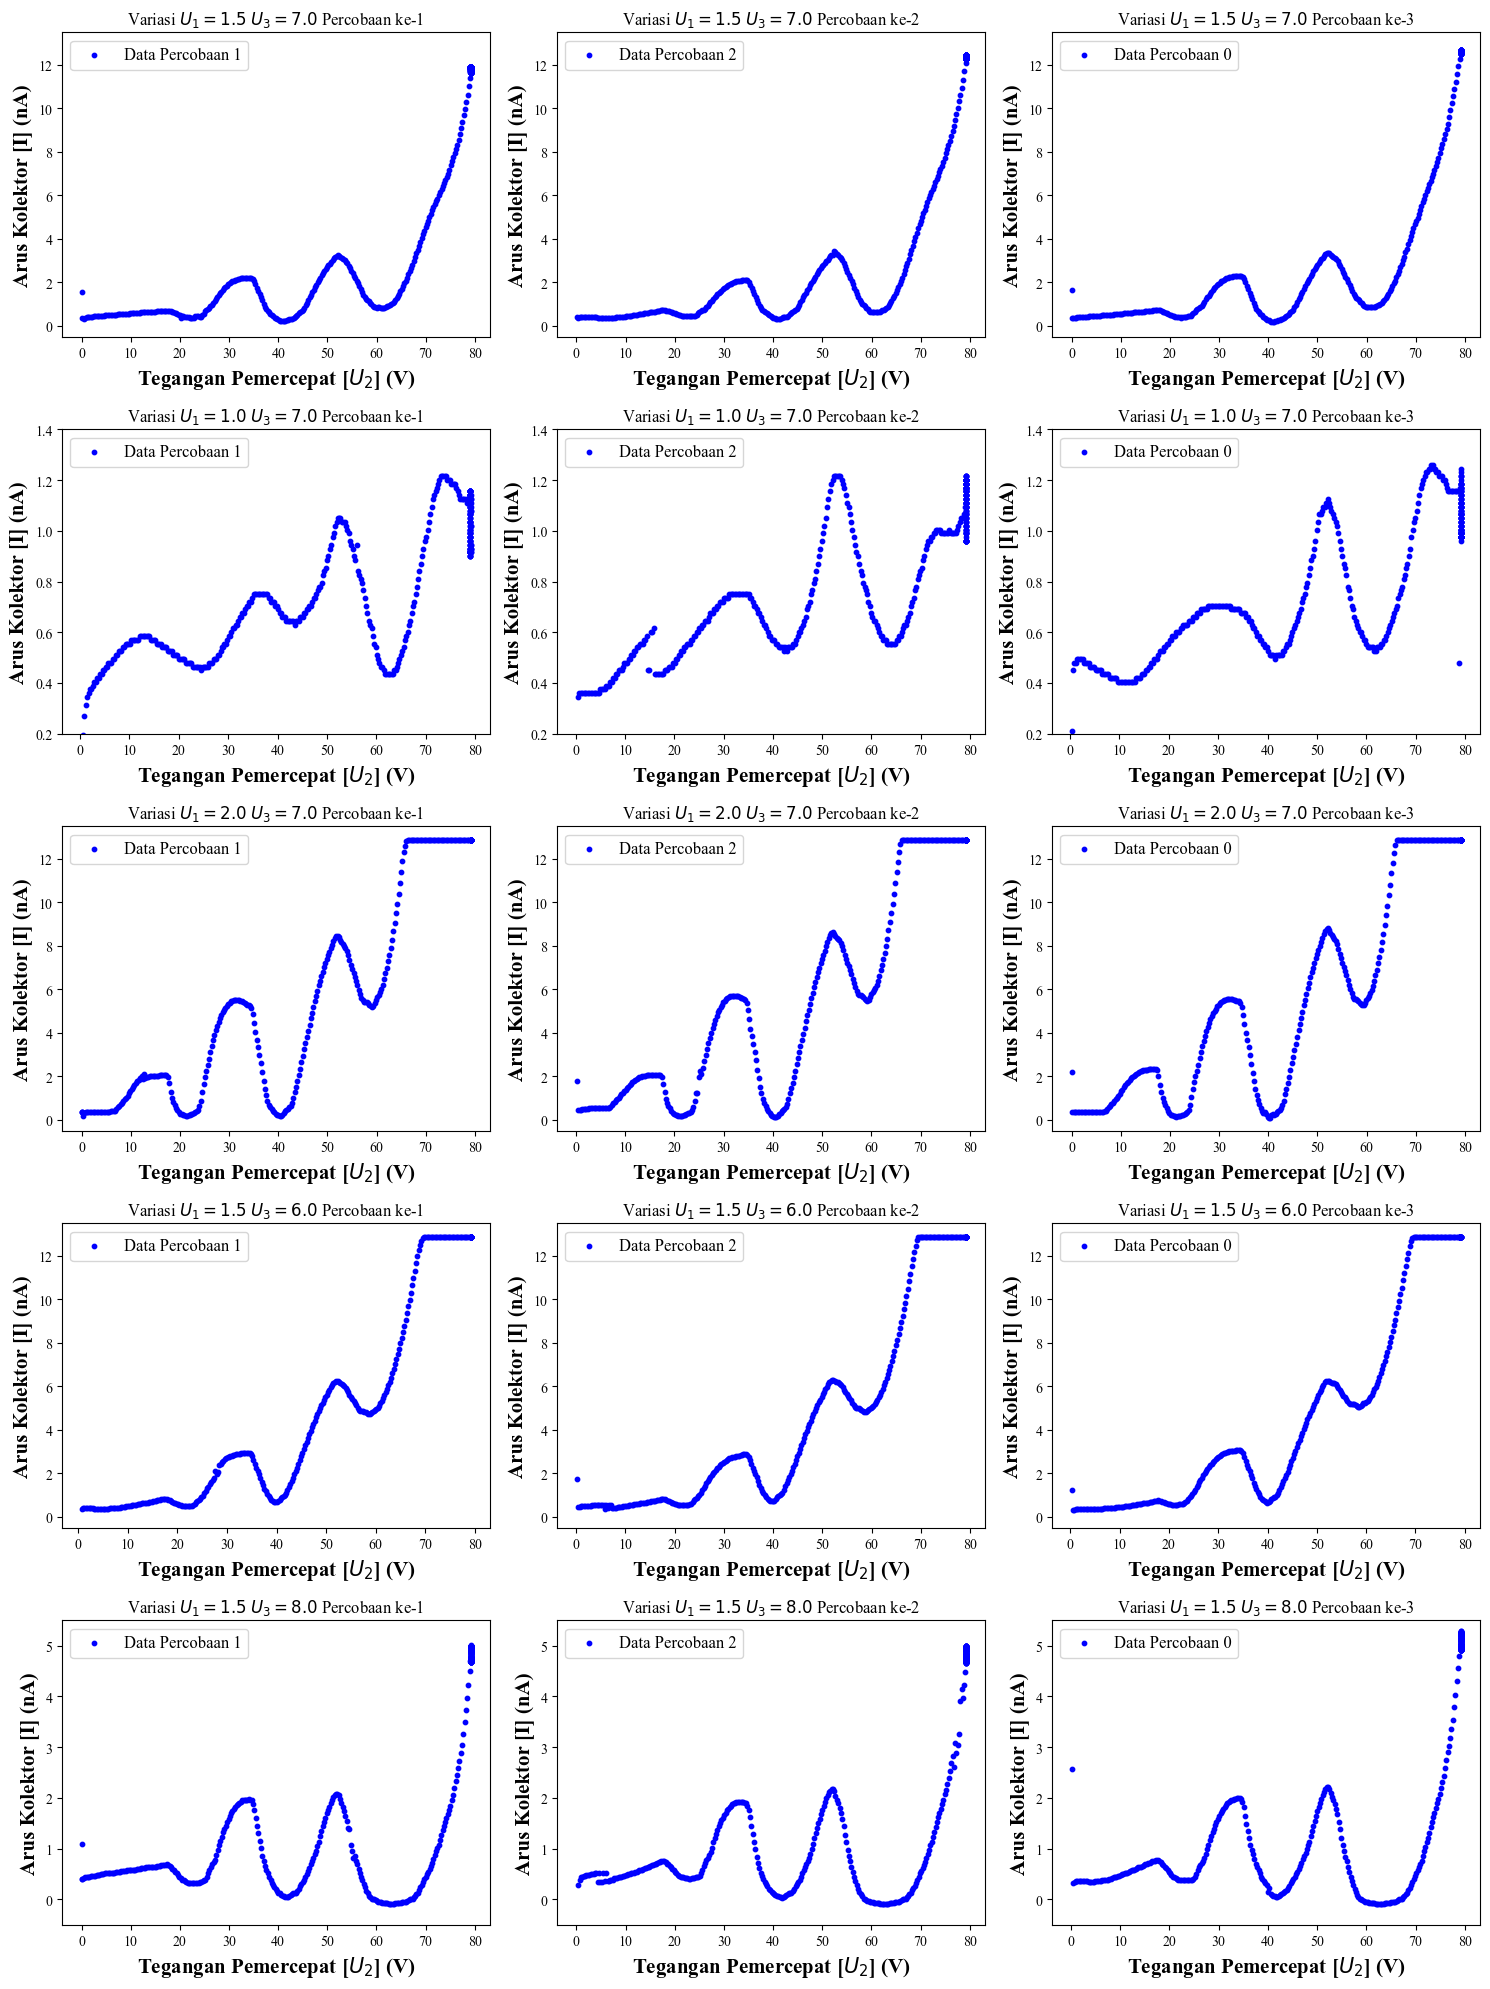

In [8]:
# gambaran formatted data

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Set up a figure with 5x3 subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust size as needed
axes = axes.flatten()  # Flatten to simplify indexing
n=0

# Loop through each csv
for i, csv_file in enumerate(csv_files[:15]):  
    n+=1 # grafik ke berapa
    variasi_ke = (n-1) // 3 + 1
    percobaan_ke = n % 3

    # Load data from the current csv
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path, sep=separator)
    
    # 'x' and 'y' columns in each csv
    x = data['Acceleration voltage U_B / V']
    y = data['Collector current I_A / nA']
    
    # Plot on the corresponding subplot
    ax = axes[i]
    # Scatter plot for the current csv
    ax.scatter(x, y, color='blue', s=10, label=('Data Percobaan '+str(percobaan_ke)))
    
    # Set titles and labels for each subplot
    ax.set_xlabel('Tegangan Pemercepat [$U_{2}$] (V)', fontsize=15, fontweight='bold')
    ax.set_ylabel('Arus Kolektor [I] (nA)', fontsize=15, fontweight='bold')
    ax.legend(fontsize=12, loc='upper left')
    ax.set_title(f'Variasi $U_{1}={csv_file[0:3]}$ $U_{3}={csv_file[4:7]}$ Percobaan ke-{csv_file[8]}')
    adjust_ylim(variasi_ke, (-0.5,13.5), (0.2, 1.4), (-0.5, 13.5), (-0.5, 13.5), (-0.5, 5.5), ax)

plt.tight_layout()
plt.show()

<div style="text-align: justify;">

We can see some notable outlier data especially for very low and high $U_{3}$. Because of this, we need a data cleaning step before any further processing. A simple data cleaning algorithm is employed as follows. The clean results are then stored in `cleaned_data/` directory.
</div>

In [10]:
# Input and output directories
input_directory = "formatted_data"
output_directory = "cleaned_data"

# Create a folder for cleaned data
os.makedirs(output_directory, exist_ok=True)

# Z-score calculation function for rolling windows
def zscore(series, window, threshold=3, return_all=False):
    # Calculate rolling mean and std
    avg = series.rolling(window=window, center=True).mean()
    std = series.rolling(window=window, center=True).std()
    
    # Z-score calculation
    z = (series - avg) / std
    
    # Identify outliers: absolute z-score greater than threshold
    mask = np.abs(z) <= threshold  # Boolean mask for non-outliers
    
    if return_all:
        return z, avg, std, mask
    return mask

# Function to clean data using rolling z-score
def clean_data_with_rolling_zscore(df, x_col, y_col, window, threshold):
    # Ensure the columns are numeric
    df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
    df[y_col] = pd.to_numeric(df[y_col], errors='coerce')
    
    # Drop NaN values
    df = df.dropna(subset=[x_col, y_col])
    
    # Apply rolling z-score method to the y_col
    mask = zscore(df[y_col], window=window, threshold=threshold)
    
    # Filter the data using the mask
    filtered_df = df[mask]
    return filtered_df

# Process each file in the folder
for file_name in os.listdir(input_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_directory, file_name)

        # Read the CSV file with the correct delimiter
        df = pd.read_csv(file_path, delimiter=';')

        # Clean the data with rolling z-score
        cleaned_df = clean_data_with_rolling_zscore(
            df, 
            x_col='Acceleration voltage U_B / V', 
            y_col='Collector current I_A / nA', 
            window=50, 
            threshold=3
        )
        
        # Save the cleaned data
        cleaned_file_path = os.path.join(output_directory, file_name)
        cleaned_df.to_csv(cleaned_file_path, index=False)

        # Read all cleaned CSV data for verification
        df = pd.read_csv(cleaned_file_path)
        print(f"Processed file: {file_name}")
        print(df.head())

print("Data cleaning completed. Cleaned files are saved in the 'cleaned_data' folder.")


Processed file: 1.0 7.0 1.csv
   Time t / s  Voltage U_A1 / V  Voltage U_B1 / V  Collector current I_A / nA  \
0       2.501             0.510             0.720                       0.510   
1       2.600             0.510             0.750                       0.510   
2       2.700             0.525             0.780                       0.525   
3       2.800             0.525             0.805                       0.525   
4       2.901             0.525             0.835                       0.525   

   Acceleration voltage U_B / V  
0                          7.20  
1                          7.50  
2                          7.80  
3                          8.05  
4                          8.35  
Processed file: 1.0 7.0 2.csv
   Time t / s  Voltage U_A1 / V  Voltage U_B1 / V  Collector current I_A / nA  \
0       2.499             0.405             0.730                       0.405   
1       2.599             0.420             0.760                       0.420   
2     

<div style="text-align: justify;">

We can see some notable outlier data especially for very low and high $U_{3}$. Because of this, we need a data cleaning step before any further processing. A simple data cleaning algorithm is employed as follows. The clean results are then stored in `cleaned_data/` directory.
</div>

In [ ]:
import os
import pandas as pd

# Direktori input dan output
input_directory = "raw_data"
output_directory = "formatted_data"

# Membuat folder output jika belum ada
os.makedirs(output_directory, exist_ok=True)

# Loop melalui semua file di direktori input
for filename in os.listdir(input_directory):
    if filename.endswith(".csv"):
        # Path lengkap file input dan output
        input_file_path = os.path.join(input_directory, filename)
        output_file_path = os.path.join(output_directory, filename)

        # Baca file CSV
        with open(input_file_path, "r") as file:
            data = file.read()
        
        # Ganti koma dengan titik
        data = data.replace(",", ".")
        
        # Simpan kembali data yang diformat ke folder output
        with open(output_file_path, "w") as file:
            file.write(data)
        
        # Baca file CSV yang telah diformat untuk verifikasi
        df = pd.read_csv(output_file_path)
        print(f"Processed file: {filename}")
        print(df)


## results and dicussion
*Write results of your work and discuss whether the purpose of the work has already achived or not. You can add also unsolved problem relate to the work. Include charts ond other visual elements here. You can also use tables. (Point: 10)*

## conclusion
*Write conclusion of the work, which differs your work with others. Include also idea for future work. (Point: 5)*

### References
<div style="text-align: justify;">

1. Bohr, N. (1913). On the Constitution of Atoms and Molecules. *Philosophical Magazine*, 26(153), 1-25.
2. Franck, J., & Hertz, G. (1914). On the Excitation of Mercury Vapor by Electron Impact. *Physical Review*, 4(1), 48-62.
3. Smith, J., Doe, A., & Johnson, L. (2020). Real-Time Observation of Quantum Dynamics. *Journal of Quantum Research*, 15(4), 233-245.
4. Chen, Y., Zhang, H., & Wang, X. (2021). Artificial Intelligence in Quantum Experiments. *International Journal of Quantum Computing*, 10(2), 89-101.
<div>